# Exploratory data analysis

In [10]:



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#load data
cols=["age_at_op","Year_op","pos_nodes","survival"]#append column names
haber=pd.read_csv("F:\\project\\MACHINE LEARNING\\haberman survival\\haberman.csv",names=cols,header=0)
haber.head()

,age_at_op,Year_op,pos_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [11]:
#find out feature and data point
haber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age_at_op    306 non-null int64
Year_op      306 non-null int64
pos_nodes    306 non-null int64
survival     306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [12]:
# fnd out dataset is balance or imbalance
#1-->patient survives 5 year or longer
#2--> patient died within 5 year

haber["survival"].value_counts()
#haber man data set is imbalanced dataset as survivals are greater than the unsirvival

1    225
2     81
Name: survival, dtype: int64

# objective: classify members who lived more than 5 years after operation

F:\accessories\anacond\envs\Py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
F:\accessories\anacond\envs\Py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


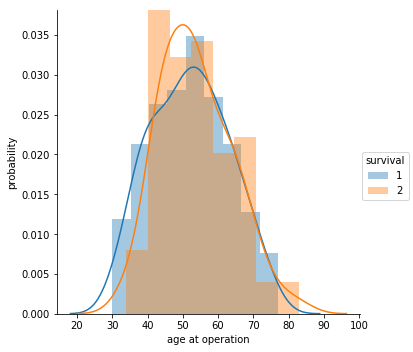

In [35]:
# UNIVARIATE ANALYSIS

# to find pdf
# variable= patient age at operation
sns.FacetGrid(haber, hue="survival", size=5)\
   .map(sns.distplot, "age_at_op")\
   .set_xlabels('age at operation')\
   .set_ylabels('probability')\
   .set_titles('PDF for ag at operation')\
   .add_legend();
plt.show() ;
   


# we cannot seggregate survivals by tking standalone character as patient age.

F:\accessories\anacond\envs\Py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
F:\accessories\anacond\envs\Py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


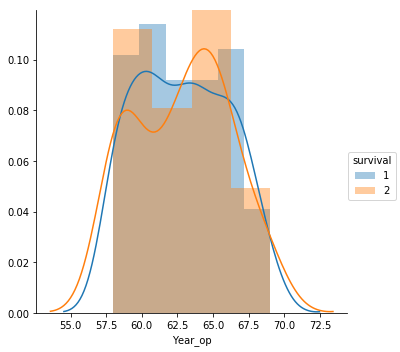

In [26]:
# variable= year of operation 
sns.FacetGrid(haber, hue="survival", size=5) \
   .map(sns.distplot, "Year_op") \
   .add_legend();
plt.show();

# clearly its not a standalone character

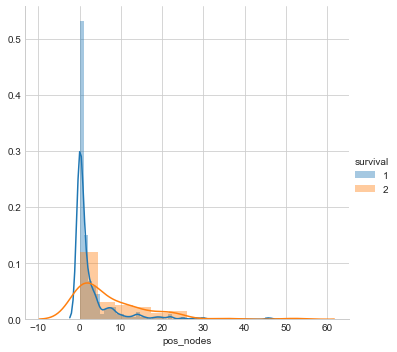

In [38]:
# variable= no. of nodes 
sns.FacetGrid(haber, hue="survival", size=5) \
   .map(sns.distplot, "pos_nodes") \
   .add_legend();
plt.show();

# it looks like an important character

Each bin include:
 [ 0.14831574  0.0188537   0.01131222  0.00502765  0.00565611  0.00125691
  0.00062846  0.          0.00062846  0.00062846]
bin value :
 [  0.    5.2  10.4  15.6  20.8  26.   31.2  36.4  41.6  46.8  52. ]
probability of getting data at each bin:
 [ 0.77124183  0.09803922  0.05882353  0.02614379  0.02941176  0.00653595
  0.00326797  0.          0.00326797  0.00326797]


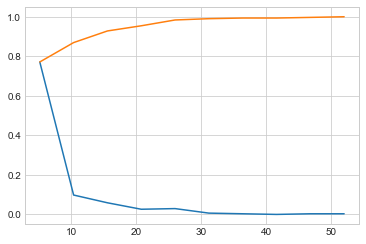

In [59]:
# findout CDF

# no. of nodes

counts, bin_ed = np.histogram(haber['pos_nodes'], bins=10, 
                                 density = True)
print("Each bin include:\n",counts)
print("bin value :\n",bin_ed)

pdf=counts/(sum(counts))

print("probability of getting data at each bin:\n",pdf)

#compute and plot cdf

cdf=np.cumsum(pdf)

plt.plot(bin_ed[1:],pdf)
plt.plot(bin_ed[1:], cdf)

plt.show()


Each bin include:
 [ 0.00986558  0.01664817  0.02836355  0.03267974  0.03391294  0.02528055
  0.02528055  0.01109878  0.00431619  0.0012332 ]
bin value :
 [ 30.   35.3  40.6  45.9  51.2  56.5  61.8  67.1  72.4  77.7  83. ]
probability of getting data at each bin:
 [ 0.05228758  0.08823529  0.1503268   0.17320261  0.17973856  0.13398693
  0.13398693  0.05882353  0.02287582  0.00653595]


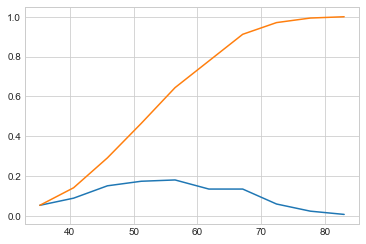

In [61]:
# cdf for patient age variable
counts, bin_ed = np.histogram(haber['age_at_op'], bins=10, 
                                 density = True)
print("Each bin include:\n",counts)
print("bin value :\n",bin_ed)

pdf=counts/(sum(counts))

print("probability of getting data at each bin:\n",pdf)

#compute and plot cdf

cdf=np.cumsum(pdf)

plt.plot(bin_ed[1:],pdf)
plt.plot(bin_ed[1:], cdf)

plt.show()


Each bin include:
 [ 0.18716578  0.08318479  0.07724302  0.06833036  0.08912656  0.09209745
  0.08318479  0.08318479  0.07427213  0.07130125]
bin value :
 [ 58.   59.1  60.2  61.3  62.4  63.5  64.6  65.7  66.8  67.9  69. ]
probability of getting data at each bin:
 [ 0.20588235  0.09150327  0.08496732  0.0751634   0.09803922  0.10130719
  0.09150327  0.09150327  0.08169935  0.07843137]


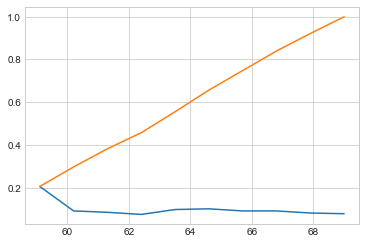

In [63]:
# yearof operation
counts, bin_ed = np.histogram(haber['Year_op'], bins=10, 
                                 density = True)
print("Each bin include:\n",counts)
print("bin value :\n",bin_ed)

pdf=counts/(sum(counts))

print("probability of getting data at each bin:\n",pdf)

#compute and plot cdf

cdf=np.cumsum(pdf)

plt.plot(bin_ed[1:],pdf)
plt.plot(bin_ed[1:], cdf)

plt.show()


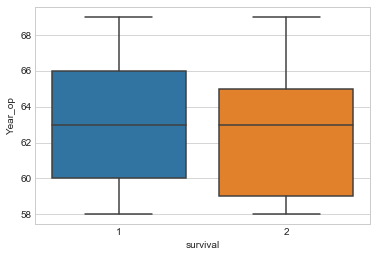

In [65]:
# boxplots for each variables
sns.boxplot(x='survival',y='Year_op', data=haber)
plt.show()

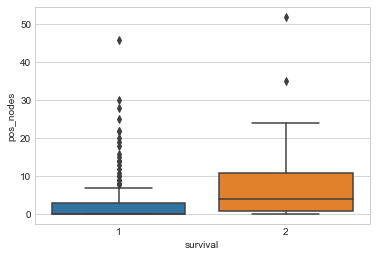

In [69]:
sns.boxplot(x='survival',y='pos_nodes', data=haber)
plt.show()

# many outliers are present if we follow box-plot defination but it might be a valid data.

# please suggest me how to deal with this problem?..what will be the better graph for this visualization ? 
# At category level 1 are they really outliers!?

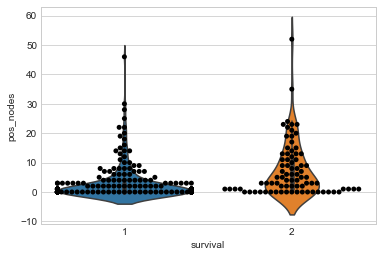

In [70]:
sns.violinplot(x='survival',y='pos_nodes',data=haber)
sns.swarmplot(x='survival',y='pos_nodes',data=haber,color='black')

# can i consider only one point =50 as outlier? is this a right visualization for this data?

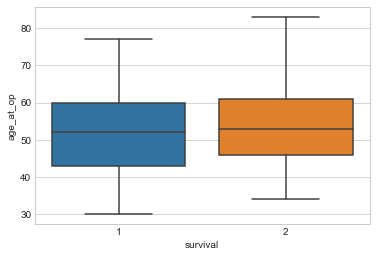

In [68]:
sns.boxplot(x='survival',y='age_at_op', data=haber)
plt.show()


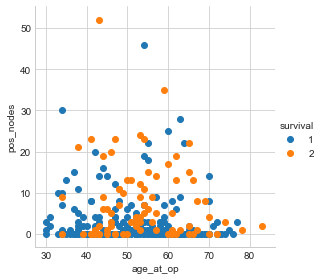

In [71]:
#Bivariate analysis

# 2d scatter plot
sns.set_style("whitegrid");
sns.FacetGrid(haber, hue="survival", size=4) \
   .map(plt.scatter,'age_at_op','pos_nodes') \
   .add_legend();
plt.show()



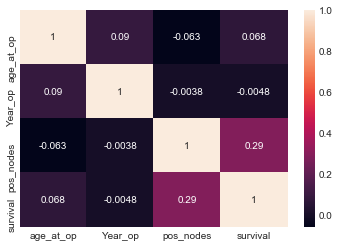

In [73]:
# let us see the correlation between variables

cor_var=haber.corr()
sns.heatmap(cor_var,annot=True) 

# we don't find any significant correlation between variables however no. of nodes are important in classifying survivals.

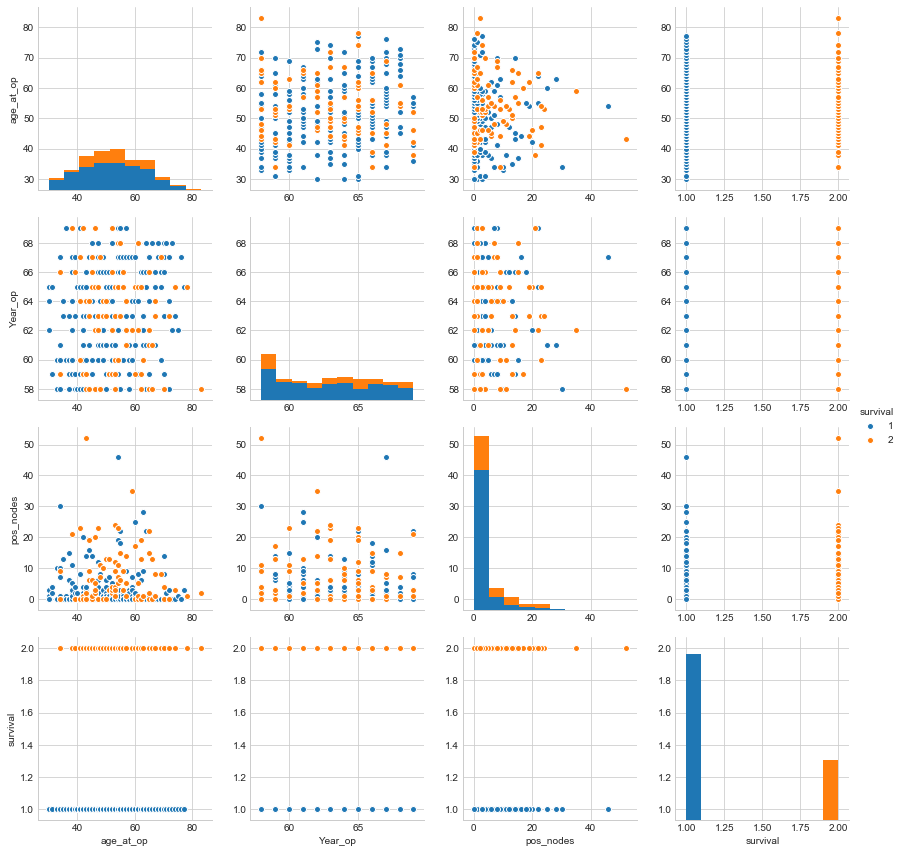

In [74]:
# pair plot
sns.set_style("whitegrid");
sns.pairplot(haber, hue="survival", size=3);
plt.show()

In [ ]:
#INFERENCE

# we can consider pos_node(no of nodes) and age_at_op(patient age) as most important variables for the classification problem using above analysis.

# THANK YOU